In [1]:
# let us import all the libraries
# to handle datasets
import numpy as np
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
# to divide train and test set
from sklearn.model_selection import train_test_split
# feature scaling
from sklearn.preprocessing import MinMaxScaler
#to buid models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# models for Stacking
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
# to evaluate the model
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error,r2_score
import math
#to find training time of the model
import time
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)
X_train, X_test, y_train, y_test = train_test_split(train_df,train_df['Hardness'],test_size=0.25,
                                                     random_state=42) 
X_train.shape, X_test.shape

((7805, 13), (2602, 13))

In [ ]:
# capture all variables in a list
# except the target and the ID
train_vars = [var for var in X_train.columns if var not in ['id', 'Hardness']]
# create scaler
scaler = MinMaxScaler()
#  fit  the scaler to the train set
scaler.fit(X_train[train_vars]) 
# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])
X_test[train_vars] = scaler.transform(X_test[train_vars])
test_df[train_vars] = scaler.transform(test_df[train_vars])
print(X_train.isnull().sum().any(),X_test.isnull().sum().any())

False False


In [ ]:
X_train.drop(["id",'Hardness'],axis=1,inplace=True)
X_test.drop(["id",'Hardness'],axis=1,inplace=True)

In [ ]:
X_train.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
8667,0.007843,0.036662,0.179104,0.800000,0.143880,0.746545,0.816149,0.773333,0.532231,0.596642,0.112046
8648,0.009412,0.035622,0.214925,0.866667,0.186409,0.707681,0.779553,0.826222,0.571220,0.592346,0.353064
7675,0.004967,0.023993,0.313433,0.666667,0.259848,0.614620,0.683125,0.835556,0.683236,0.578294,0.197665
4156,0.010196,0.015875,0.171642,0.805556,0.134884,0.712220,0.811211,0.760000,0.568848,0.580745,0.057416
8844,0.028758,0.067659,0.142764,0.797101,0.115668,0.720776,0.788746,0.761643,0.536536,0.593352,0.072543


In [ ]:
y_train.head()

8667    6.0
8648    3.8
7675    3.8
4156    5.3
8844    7.0
Name: Hardness, dtype: float64

### KNeighborsRegressor

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
from sklearn.metrics import median_absolute_error

In [10]:
knn = KNeighborsRegressor(5)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)
mean_squared_log_error(pred,y_test)

0.07271748753689036

In [11]:
median_absolute_error(pred,y_test)

0.7400000000000002

### Support Vector Machine

In [12]:
from sklearn.svm import SVR

In [52]:
svm = SVR(gamma=2,C=1,verbose=False,kernel='rbf')

In [53]:
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
median_absolute_error(pred, y_test)

0.6242927750367706

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
median_absolute_error(pred,y_test)

0.7099999999999993

In [17]:
scaler.fit_transform(test_df[train_vars]) 

array([[0.08738632, 0.18880605, 0.52776119, ..., 0.74288073, 0.55920677,
        0.1635907 ],
       [0.0088968 , 0.01544403, 0.26865672, ..., 0.53487412, 0.57651545,
        0.12870921],
       [0.01146698, 0.0120791 , 0.17313433, ..., 0.59430458, 0.60474582,
        0.07186326],
       ...,
       [0.00672202, 0.00706791, 0.16915423, ..., 0.56747833, 0.60421333,
        0.06693254],
       [0.00395413, 0.00362958, 0.09950249, ..., 0.38175815, 0.80363766,
        0.04669736],
       [0.01324634, 0.02735215, 1.        , ..., 0.87288485, 0.48624681,
        0.04014129]])

In [18]:
test_id = test_df['id']
test_df.drop('id',axis =1,inplace=True)

In [19]:
pred = rf.predict(test_df)

In [20]:
RF = pd.DataFrame({'id': test_id , 'Hardness': pred})
RF.to_csv('submmmmm.csv', index=False)

In [21]:
from sklearn.neural_network import MLPRegressor

In [22]:
mlp = MLPRegressor(alpha=1,max_iter=1000)
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)
median_absolute_error(pred,y_test)

0.9079232870888472

### Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dt = DecisionTreeRegressor(max_depth=7)

dt.fit(X_train,y_train)
pred = dt.predict(X_test)
median_absolute_error(pred,y_test)

0.6742021276595818

In [25]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimators = [
    ("knn",knn),
    ("svm",svm),
    ("dt",dt),
    ('rf',rf),
    ("mlp",mlp)
]

stack_model = StackingRegressor(estimators=estimators,final_estimator=LinearRegression())

stack_model.fit(X_train,y_train)
pred = stack_model.predict(X_test)

In [26]:

median_absolute_error(pred,y_test)

0.6794815735354989

In [27]:
from sklearn.linear_model import LassoCV,RidgeCV

In [28]:

stack_model = StackingRegressor(estimators=estimators,final_estimator=LassoCV())

stack_model.fit(X_train,y_train)
pred = stack_model.predict(X_test)

In [29]:
median_absolute_error(pred,y_test)

0.6831060691347375

In [30]:

stack_model = StackingRegressor(estimators=estimators,final_estimator=RidgeCV())

stack_model.fit(X_train,y_train)
pred = stack_model.predict(X_test)
median_absolute_error(pred,y_test)

0.6898541310736523

In [31]:
test_df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0.057778,0.188806,0.527761,0.880000,0.493197,0.614620,0.667441,0.847644,0.742648,0.559207,0.163591
1,0.005882,0.015444,0.268657,0.933333,0.236368,0.792762,0.832994,0.734222,0.534706,0.576515,0.128709
2,0.007582,0.012079,0.173134,0.800000,0.138780,0.723073,0.767935,0.797333,0.594118,0.604746,0.071863
3,0.006536,0.014163,0.149254,0.800000,0.121260,0.792762,0.821377,0.738667,0.490148,0.600244,0.109814
4,0.003595,0.006267,0.164179,0.666667,0.137262,0.739938,0.713041,0.777778,0.552860,0.576393,0.085192


In [32]:
pred = stack_model.predict(test_df)
stack_pred = pd.DataFrame({'id': test_id , 'Hardness': pred})
stack_pred.to_csv('subm_new2.csv', index=False)

In [33]:
from sklearn.ensemble import IsolationForest

In [34]:
ISF = IsolationForest()
ISF.fit(X_train,y_train)
pred = ISF.predict(X_test)
median_absolute_error(pred,y_test)

4.5

In [35]:
pred = ISF.predict(test_df)
stack_pred = pd.DataFrame({'id': test_id , 'Hardness': pred})
stack_pred.to_csv('subm_.csv', index=False)

In [37]:
pred = svm.predict(test_df)
svm_pred = pd.DataFrame({'id': test_id , 'Hardness': pred})
svm_pred.to_csv('svm_subm_.csv', index=False)

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


In [ ]:
X_poly_test = poly_reg.fit_transform(X_test)

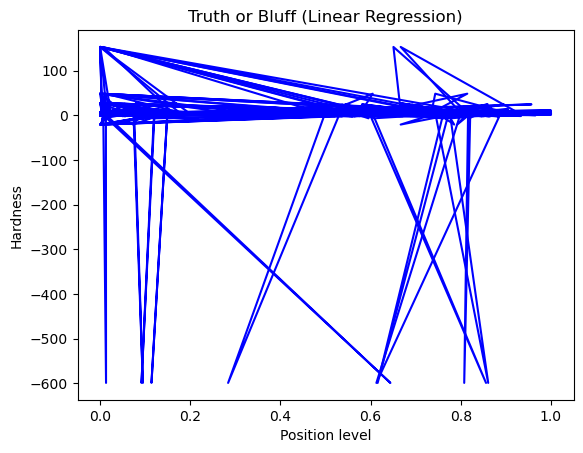

In [ ]:
# Visualising the Linear Regression results
# plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_test, lin_reg_2.predict(X_poly_test), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Hardness')
plt.show()

In [ ]:
pred = lin_reg_2.predict(X_poly_test)
median_absolute_error(pred,y_test)

0.8037479943108679